In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [2]:
os.chdir("G:\edwisor_project1")

In [3]:
training_dataset=pd.read_csv("train_data.csv")

In [4]:
test_dataset=pd.read_csv("test.csv")

In [5]:
training_dataset.shape

(200000, 202)

In [6]:
test_dataset.shape

(200000, 201)

In [7]:
training_dataset.columns

Index(['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_191', 'var_192', 'var_193', 'var_194', 'var_195', 'var_196',
       'var_197', 'var_198', 'var_199', 'target'],
      dtype='object', length=202)

In [8]:
test_dataset.columns

Index(['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [9]:
pd.DataFrame(training_dataset.dtypes)

,0
ID_code,object
var_0,float64
var_1,float64
var_2,float64
var_3,float64
var_4,float64
var_5,float64
var_6,float64
var_7,float64
var_8,float64


In [10]:
pd.DataFrame(test_dataset.dtypes)

,0
ID_code,object
var_0,float64
var_1,float64
var_2,float64
var_3,float64
var_4,float64
var_5,float64
var_6,float64
var_7,float64
var_8,float64


In [11]:
training_dataset=training_dataset.iloc[:,1:202]

In [12]:
training_dataset

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,0
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,0
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,0
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996,0
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104,0
5,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,...,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602,0
6,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,-4.3781,7.9232,...,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097,0
7,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,5.0647,7.1971,...,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806,0
8,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,-3.1882,9.0827,...,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453,0
9,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,0.1287,7.9682,...,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514,0


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labelencoder = LabelEncoder()

In [15]:
training_dataset['target'] = training_dataset['target'].astype('category')

In [16]:
test_dataset=test_dataset.iloc[:,1:201]

In [17]:
test_dataset

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,7.2842,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240
6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.1670,13.0809,-4.3004,6.3181,...,12.3609,6.8661,4.0971,8.8484,17.5010,0.0295,7.7443,9.1509,18.4736,5.1499
7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,7.4643,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,7.2215,...,-3.4657,7.8754,2.4698,-0.0362,16.7144,0.1221,-1.4328,9.9207,16.9865,-3.3304
9,10.3811,-6.9348,14.6690,9.0941,11.9058,-10.8018,3.4508,20.2816,-1.4112,6.7401,...,1.8052,11.0723,0.8907,4.7680,15.1425,0.6075,-4.4447,9.5788,15.8146,9.3457


In [18]:
missing_val = pd.DataFrame(training_dataset.isnull().sum())

In [19]:
missing_val

,0
var_0,0
var_1,0
var_2,0
var_3,0
var_4,0
var_5,0
var_6,0
var_7,0
var_8,0
var_9,0


In [20]:
missing_val1 = pd.DataFrame(test_dataset.isnull().sum())

In [21]:
missing_val1

,0
var_0,0
var_1,0
var_2,0
var_3,0
var_4,0
var_5,0
var_6,0
var_7,0
var_8,0
var_9,0


In [22]:
df = training_dataset.copy()

In [23]:
training_dataset = df.copy()

In [24]:
cnames=["var_0","var_1","var_2","var_3","var_4","var_5","var_6","var_7","var_8","var_9","var_10","var_11","var_12","var_13","var_14","var_15","var_16",
       "var_17","var_18","var_19","var_20","var_21","var_22","var_23","var_24","var_25","var_26","var_27","var_28","var_29","var_30","var_31","var_32",
       "var_33","var_34","var_35","var_36","var_37","var_38","var_39","var_40","var_41","var_42","var_43","var_44","var_45","var_46","var_47","var_48",
       "var_49","var_50","var_51","var_52","var_53","var_54","var_55","var_56","var_57","var_58","var_59","var_60","var_61","var_62","var_63","var_64",
       "var_65","var_66","var_67","var_68","var_69","var_70","var_71","var_72","var_73","var_74","var_75","var_76","var_77","var_78","var_79","var_80",
       "var_81","var_82","var_83","var_84","var_85","var_86","var_87","var_88","var_89","var_90","var_91","var_92","var_93","var_94","var_95","var_96",
       "var_97","var_98","var_99","var_100","var_101","var_102","var_103","var_104","var_105","var_106","var_107","var_108","var_109","var_110","var_111","var_112",
       "var_113","var_114","var_115","var_116","var_117","var_118","var_119","var_120","var_121","var_122","var_123","var_124","var_125","var_126","var_127","var_128",
       "var_129","var_130","var_131","var_132","var_133","var_134","var_135","var_136","var_137","var_138","var_139","var_140","var_141","var_142","var_143","var_144",
       "var_145","var_146","var_147","var_148","var_149","var_150","var_151","var_152","var_153","var_154","var_155","var_156","var_157","var_158","var_159","var_160",
       "var_161","var_162","var_163","var_164","var_165","var_166","var_167","var_168","var_169","var_170","var_171","var_172","var_173","var_174","var_175","var_176",
       "var_177","var_178","var_179","var_180","var_181","var_182","var_183","var_184","var_185","var_186","var_187","var_188","var_189","var_190","var_191","var_192",
       "var_193","var_194","var_195","var_196","var_197","var_198","var_199"]

In [25]:
cnames

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

In [26]:
col_names=["var_0","var_1","var_2","var_3","var_4","var_5","var_6","var_7","var_8","var_9","var_10","var_11","var_12","var_13","var_14","var_15","var_16",
       "var_17","var_18","var_19","var_20","var_21","var_22","var_23","var_24","var_25","var_26","var_27","var_28","var_29","var_30","var_31","var_32",
       "var_33","var_34","var_35","var_36","var_37","var_38","var_39","var_40","var_41","var_42","var_43","var_44","var_45","var_46","var_47","var_48",
       "var_49","var_50","var_51","var_52","var_53","var_54","var_55","var_56","var_57","var_58","var_59","var_60","var_61","var_62","var_63","var_64",
       "var_65","var_66","var_67","var_68","var_69","var_70","var_71","var_72","var_73","var_74","var_75","var_76","var_77","var_78","var_79","var_80",
       "var_81","var_82","var_83","var_84","var_85","var_86","var_87","var_88","var_89","var_90","var_91","var_92","var_93","var_94","var_95","var_96",
       "var_97","var_98","var_99","var_100","var_101","var_102","var_103","var_104","var_105","var_106","var_107","var_108","var_109","var_110","var_111","var_112",
       "var_113","var_114","var_115","var_116","var_117","var_118","var_119","var_120","var_121","var_122","var_123","var_124","var_125","var_126","var_127","var_128",
       "var_129","var_130","var_131","var_132","var_133","var_134","var_135","var_136","var_137","var_138","var_139","var_140","var_141","var_142","var_143","var_144",
       "var_145","var_146","var_147","var_148","var_149","var_150","var_151","var_152","var_153","var_154","var_155","var_156","var_157","var_158","var_159","var_160",
       "var_161","var_162","var_163","var_164","var_165","var_166","var_167","var_168","var_169","var_170","var_171","var_172","var_173","var_174","var_175","var_176",
       "var_177","var_178","var_179","var_180","var_181","var_182","var_183","var_184","var_185","var_186","var_187","var_188","var_189","var_190","var_191","var_192",
       "var_193","var_194","var_195","var_196","var_197","var_198","var_199"]

In [27]:
col_names

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

In [28]:
for i in cnames:
   print(i)
   q75, q25 = np.percentile(training_dataset.loc[:,i], [75 ,25])
   iqr = q75 - q25
   min = q25 - (iqr*1.5)
   max = q75 + (iqr*1.5)
   print(min)
   print(max)
   training_dataset = training_dataset.drop(training_dataset[training_dataset.loc[:,i] < min].index)
   training_dataset = training_dataset.drop(training_dataset[training_dataset.loc[:,i] > max].index)

var_0
1.9973250000000018
19.214725
var_1
-13.888612499999997
10.507087499999999
var_2
3.031512499999998
18.207612500000003
var_3
0.6484500000000004
12.929649999999999
var_4
6.3163750000000025
15.827774999999997
var_5
-29.38955
19.11405
var_6
2.9145000000000008
7.856099999999998
var_7
6.206024999999997
26.839825000000005
var_8
-10.2005625
10.8209375
var_9
3.6705499999999995
11.53255
var_10
-15.5628
16.3516
var_11
-20.0544
13.399200000000002
var_12
13.488700000000001
14.569499999999998
var_13
-5.730549999999998
23.077849999999998
var_14
0.5459000000000014
14.504299999999999
var_15
13.345000000000002
15.792199999999998
var_16
2.048700000000002
16.4591
var_17
-24.981524999999998
13.696475
var_18
-8.5675
38.7573
var_19
-11.95475
36.660849999999996
var_20
-5.251424999999999
31.758375
var_21
-5.760100000000001
40.4015
var_22
-3.984325000000001
12.459875
var_23
1.4802499999999994
4.557450000000001
var_24
-1.1814875000000011
22.2772125
var_25
12.845600000000001
14.4744
var_26
-20.6719375
12.258

In [29]:
training_dataset.shape

(175073, 201)

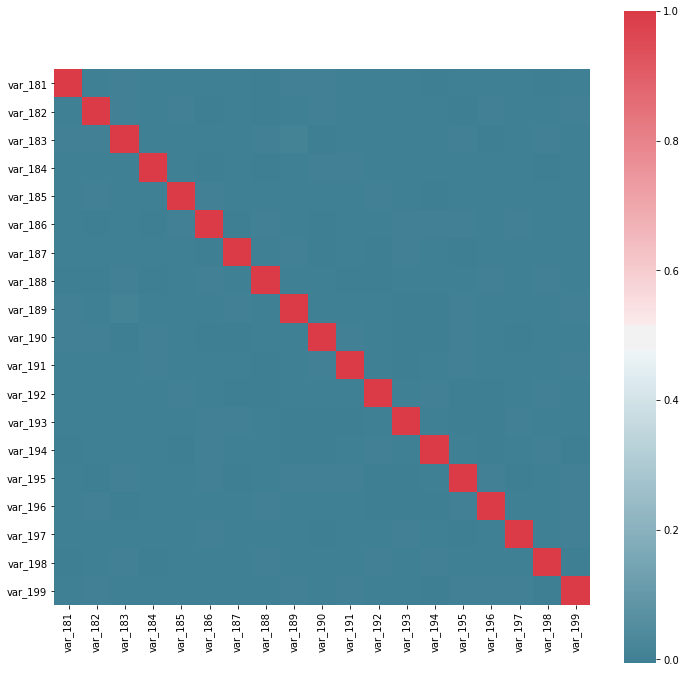

In [30]:
df_corr = training_dataset.iloc[:,181:202]
f, ax = plt.subplots(figsize=(12, 12))
corr = df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [31]:
df = training_dataset.copy()

In [32]:
training_dataset = df.copy()

(array([  16.,   14.,   28.,   27.,   37.,   48.,   44.,   60.,   72.,
          97.,  155.,  159.,  186.,  220.,  269.,  332.,  381.,  410.,
         490.,  530.,  607.,  766.,  822.,  929.,  958., 1145., 1258.,
        1418., 1510., 1654., 1696., 1961., 2002., 2167., 2250., 2383.,
        2583., 2611., 2741., 2856., 2871., 3055., 3052., 3141., 3111.,
        3185., 3243., 3234., 3301., 3185., 3435., 3415., 3297., 3257.,
        3238., 3281., 3265., 3145., 3218., 3099., 3134., 3072., 3035.,
        2870., 2964., 2775., 2809., 2802., 2997., 2980., 2980., 2791.,
        2694., 2431., 2290., 2074., 1969., 1947., 1862., 1673., 1605.,
        1462., 1311., 1234., 1124., 1053., 1005.,  900.,  830.,  774.,
         784.,  684.,  694.,  598.,  636.,  536.,  515.,  470.,  441.,
         404.,  492.,  421.,  423.,  404.,  394.,  370.,  391.,  365.,
         266.,  230.,  130.,   58.]),
 array([ 2.0044    ,  2.15805268,  2.31170536,  2.46535804,  2.61901071,
         2.77266339,  2.92631607,  3.

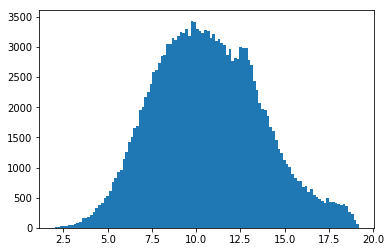

In [33]:
%matplotlib inline  
plt.hist(training_dataset['var_0'], bins='auto')

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
        2.000e+00, 3.000e+00, 8.000e+00, 6.000e+00, 6.000e+00, 1.000e+01,
        7.000e+00, 2.700e+01, 2.100e+01, 4.600e+01, 2.800e+01, 4.700e+01,
        6.800e+01, 7.000e+01, 1.040e+02, 1.150e+02, 8.300e+01, 1.690e+02,
        2.040e+02, 2.130e+02, 2.350e+02, 3.490e+02, 3.010e+02, 3.570e+02,
        4.910e+02, 4.700e+02, 6.050e+02, 6.860e+02, 7.680e+02, 8.260e+02,
        9.960e+02, 1.157e+03, 1.114e+03, 1.305e+03, 1.456e+03, 1.555e+03,
        1.657e+03, 1.964e+03, 1.911e+03, 2.019e+03, 2.142e+03, 2.201e+03,
        2.576e+03, 2.637e+03, 2.781e+03, 3.007e+03, 2.896e+03, 3.011e+03,
        2.984e+03, 3.207e+03, 3.254e+03, 3.375e+03, 3.513e+03, 3.343e+03,
        3.603e+03, 3.512e+03, 3.496e+03, 3.703e+03, 3.567e+03, 3.680e+03,
        3.771e+03, 3.663e+03, 3.465e+03, 3.575e+03, 3.530e+03, 3.534e+03,
        3.501e+03, 3.533e+03, 3.513e+03, 3.374e+03, 3.225e+03, 3.467e+03,
        3.195e+03, 3.123e+03, 2.950e+0

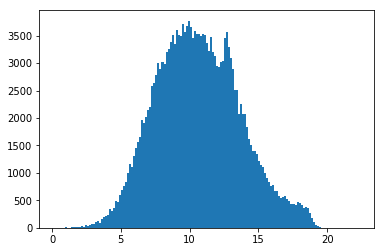

In [34]:
%matplotlib inline  
plt.hist(test_dataset['var_0'], bins='auto')

In [35]:
cnames=["var_0","var_1","var_2","var_3","var_4","var_5","var_6","var_7","var_8","var_9","var_10","var_11","var_12","var_13","var_14","var_15","var_16",
       "var_17","var_18","var_19","var_20","var_21","var_22","var_23","var_24","var_25","var_26","var_27","var_28","var_29","var_30","var_31","var_32",
       "var_33","var_34","var_35","var_36","var_37","var_38","var_39","var_40","var_41","var_42","var_43","var_44","var_45","var_46","var_47","var_48",
       "var_49","var_50","var_51","var_52","var_53","var_54","var_55","var_56","var_57","var_58","var_59","var_60","var_61","var_62","var_63","var_64",
       "var_65","var_66","var_67","var_68","var_69","var_70","var_71","var_72","var_73","var_74","var_75","var_76","var_77","var_78","var_79","var_80",
       "var_81","var_82","var_83","var_84","var_85","var_86","var_87","var_88","var_89","var_90","var_91","var_92","var_93","var_94","var_95","var_96",
       "var_97","var_98","var_99","var_100","var_101","var_102","var_103","var_104","var_105","var_106","var_107","var_108","var_109","var_110","var_111","var_112",
       "var_113","var_114","var_115","var_116","var_117","var_118","var_119","var_120","var_121","var_122","var_123","var_124","var_125","var_126","var_127","var_128",
       "var_129","var_130","var_131","var_132","var_133","var_134","var_135","var_136","var_137","var_138","var_139","var_140","var_141","var_142","var_143","var_144",
       "var_145","var_146","var_147","var_148","var_149","var_150","var_151","var_152","var_153","var_154","var_155","var_156","var_157","var_158","var_159","var_160",
       "var_161","var_162","var_163","var_164","var_165","var_166","var_167","var_168","var_169","var_170","var_171","var_172","var_173","var_174","var_175","var_176",
       "var_177","var_178","var_179","var_180","var_181","var_182","var_183","var_184","var_185","var_186","var_187","var_188","var_189","var_190","var_191","var_192",
       "var_193","var_194","var_195","var_196","var_197","var_198","var_199"]

In [36]:
for i in cnames:
    print(i)
    training_dataset[i] = (training_dataset[i] - training_dataset[i].mean())/training_dataset[i].std()

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [37]:
col_names=["var_0","var_1","var_2","var_3","var_4","var_5","var_6","var_7","var_8","var_9","var_10","var_11","var_12","var_13","var_14","var_15","var_16",
       "var_17","var_18","var_19","var_20","var_21","var_22","var_23","var_24","var_25","var_26","var_27","var_28","var_29","var_30","var_31","var_32",
       "var_33","var_34","var_35","var_36","var_37","var_38","var_39","var_40","var_41","var_42","var_43","var_44","var_45","var_46","var_47","var_48",
       "var_49","var_50","var_51","var_52","var_53","var_54","var_55","var_56","var_57","var_58","var_59","var_60","var_61","var_62","var_63","var_64",
       "var_65","var_66","var_67","var_68","var_69","var_70","var_71","var_72","var_73","var_74","var_75","var_76","var_77","var_78","var_79","var_80",
       "var_81","var_82","var_83","var_84","var_85","var_86","var_87","var_88","var_89","var_90","var_91","var_92","var_93","var_94","var_95","var_96",
       "var_97","var_98","var_99","var_100","var_101","var_102","var_103","var_104","var_105","var_106","var_107","var_108","var_109","var_110","var_111","var_112",
       "var_113","var_114","var_115","var_116","var_117","var_118","var_119","var_120","var_121","var_122","var_123","var_124","var_125","var_126","var_127","var_128",
       "var_129","var_130","var_131","var_132","var_133","var_134","var_135","var_136","var_137","var_138","var_139","var_140","var_141","var_142","var_143","var_144",
       "var_145","var_146","var_147","var_148","var_149","var_150","var_151","var_152","var_153","var_154","var_155","var_156","var_157","var_158","var_159","var_160",
       "var_161","var_162","var_163","var_164","var_165","var_166","var_167","var_168","var_169","var_170","var_171","var_172","var_173","var_174","var_175","var_176",
       "var_177","var_178","var_179","var_180","var_181","var_182","var_183","var_184","var_185","var_186","var_187","var_188","var_189","var_190","var_191","var_192",
       "var_193","var_194","var_195","var_196","var_197","var_198","var_199"]

In [38]:
for i in col_names:
    print(i)
    test_dataset[i] = (test_dataset[i] - test_dataset[i].mean())/test_dataset[i].std()

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [39]:
test_dataset

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.133981,2.327440,0.852788,1.286577,0.220421,0.339301,0.502073,0.507626,0.556963,1.007084,...,-1.174486,1.451556,-2.267582,-0.218044,-1.364610,1.818981,0.380898,1.962823,-0.131944,-0.526356
1,-0.700868,0.712421,0.226755,-0.780628,-1.162419,0.132014,0.699023,0.613949,-1.407053,-1.295196,...,1.631805,0.455056,-0.665991,1.703420,-0.770689,0.427339,-0.693327,1.041337,1.083557,-1.705006
2,-1.704485,-2.161573,-0.215177,0.126508,-0.503323,1.887814,-0.601564,1.087627,0.373845,0.628959,...,-0.865295,1.168598,0.036728,-0.285818,-1.597014,1.582004,-1.725836,-2.009577,1.338250,-1.916900
3,-0.698563,0.074754,0.499090,-0.103917,-1.379932,1.045197,-0.549869,1.178823,0.929498,-0.090600,...,1.401911,0.534952,-0.181048,0.064892,-0.894581,2.307692,0.305857,0.344305,-0.948040,-0.092749
4,0.344801,0.369147,1.299238,0.468834,-1.220509,-0.449118,1.670359,-1.729997,0.813549,-0.345580,...,0.227660,0.566586,-0.434094,0.013961,0.495831,-0.106558,-1.368275,-1.763732,-0.645851,-0.571064
5,-1.538681,-0.165092,-0.797927,0.136544,1.961142,-0.460720,-1.351316,-0.515682,0.480554,-0.231525,...,-1.164796,-0.112545,-1.588445,1.390551,-0.972144,-1.455882,-1.526565,0.976510,0.413305,1.353101
6,-0.723261,-1.109330,-1.270802,0.718307,0.577808,-0.274071,-1.443488,-1.006939,-1.373243,-1.015783,...,2.015085,-0.195746,1.467031,1.383118,-0.157918,0.114121,1.001296,0.258954,0.865624,0.807441
7,2.188141,-0.197242,1.021853,0.785096,0.000805,1.867443,0.629634,0.385038,-1.525161,-0.085324,...,0.280766,-1.003861,-0.672748,-0.456156,-0.869936,-1.160711,0.778632,1.708182,2.523972,0.382229
8,-1.209576,0.609934,1.142284,-0.980801,-1.483492,-1.106852,-1.245035,-0.567923,0.693341,-0.282423,...,-1.462342,0.137886,0.367479,-0.840479,-0.408376,0.178891,-0.683706,1.094871,0.371360,-0.008084
9,-0.091427,-1.314328,1.504068,1.123330,0.513098,-0.730846,-2.271765,1.095774,-0.506494,-0.673213,...,-0.304217,1.194646,-0.699505,0.361894,-0.908877,0.518408,-1.236719,0.723606,-0.018142,1.210938


In [40]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [41]:
training_dataset

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,-0.578728,-1.272068,0.454027,-0.833503,0.235860,-0.535435,-0.334458,0.608947,-1.563650,-1.474083,...,-1.148506,0.832977,-0.418098,0.168799,-1.583033,1.023302,-0.374047,-1.030726,0.214392,0
2,-0.683015,-0.274095,0.519442,0.537069,-0.306121,-0.510050,1.775701,-0.564801,-1.563440,-1.307683,...,0.783441,-0.174259,-0.419413,1.152027,2.303425,-1.616908,-0.695353,-0.384178,0.357107,0
3,0.125395,-0.127410,-0.667540,0.195821,0.929475,0.411208,0.503243,-0.474234,-1.846059,0.548631,...,-0.890164,-0.828756,-0.486300,1.608463,-0.792201,-0.957979,1.502448,0.697064,-0.544139,0
4,-0.278134,0.037676,0.820750,-0.077432,0.739763,0.955846,0.616270,0.791779,1.793620,0.089836,...,0.694210,-1.425540,1.480014,-1.501588,-0.961635,0.298751,0.645884,0.706287,-0.525992,0
5,0.262566,-0.168508,0.719593,0.896185,-0.071851,1.097233,-1.012971,-0.386300,0.989255,-1.286225,...,-0.273670,2.313463,-0.734492,-0.972690,0.822860,-1.085701,0.932346,-1.097116,-0.137508,0
6,0.372328,0.383506,-0.516829,-1.225808,0.035163,-0.374816,0.911970,-1.307600,-1.401000,0.288059,...,-0.323542,1.105123,-0.800923,0.107760,0.509319,1.249191,0.223844,-1.661127,0.011211,0
7,0.949142,-1.568896,1.201322,0.393002,-1.496110,0.750229,0.325314,1.691542,1.433233,-0.299888,...,-0.291377,1.419867,0.622914,1.642285,-0.165681,0.352125,0.559696,-2.401765,0.652925,0
8,1.789875,1.007344,1.221470,-0.569306,-1.405328,1.427992,-1.106448,-1.861159,-1.043855,1.226945,...,2.428296,-0.195489,-0.487134,-1.007214,-1.299731,-0.618008,-0.771338,1.210367,0.783823,0
9,0.603100,0.891680,-0.688864,-0.658351,1.558783,-1.425538,0.758799,0.086436,-0.048295,0.324497,...,-0.368671,-0.609376,0.087217,-1.008044,0.412640,2.169305,-1.079835,0.120335,1.686029,0
10,-1.850265,0.269522,-0.425537,-1.222333,0.809995,-1.753844,0.729298,-0.633802,-0.228324,-0.200534,...,0.216885,-1.174968,-0.865128,-0.968446,-0.753894,0.799466,0.376899,-0.527612,-0.416147,0


In [42]:
X = training_dataset.iloc[:, 0:200]
y = training_dataset.iloc[:,200]


In [43]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2,random_state = 0)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
classifier = LogisticRegression(solver='liblinear')

In [46]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred=classifier.predict(X_test)


In [48]:
CM = pd.crosstab(y_test, y_pred)



In [49]:
CM

col_0,0,1
target,,
0,31268,437
1,2415,895


In [50]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [51]:
((TP+TN)*100)/(TP+TN+FP+FN)

91.8549193202913

In [52]:
(FN*100)/(FN+TP)

72.9607250755287

In [53]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(X_train, y_train)
NB_Predictions = NB_model.predict(X_test)
CM = pd.crosstab(y_test, NB_Predictions)


In [54]:
CM

col_0,0,1
target,,
0,31232,473
1,2117,1193


In [55]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [56]:
((TP+TN)*100)/(TP+TN+FP+FN)

92.60317006997002

In [57]:
(FN*100)/(FN+TP)

63.957703927492446

In [61]:
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)


In [62]:
C50_Predictions = C50_model.predict(X_test)


In [63]:
CM = pd.crosstab(y_test, C50_Predictions)


In [64]:
CM

col_0,0,1
target,,
0,28722,2983
1,2679,631


In [65]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [66]:
((TP+TN)*100)/(TP+TN+FP+FN)

83.82978723404256

In [67]:
(FN*100)/(FN+TP)

80.93655589123867

In [68]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [69]:
training_dataset

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,-0.578728,-1.272068,0.454027,-0.833503,0.235860,-0.535435,-0.334458,0.608947,-1.563650,-1.474083,...,-1.148506,0.832977,-0.418098,0.168799,-1.583033,1.023302,-0.374047,-1.030726,0.214392,0
2,-0.683015,-0.274095,0.519442,0.537069,-0.306121,-0.510050,1.775701,-0.564801,-1.563440,-1.307683,...,0.783441,-0.174259,-0.419413,1.152027,2.303425,-1.616908,-0.695353,-0.384178,0.357107,0
3,0.125395,-0.127410,-0.667540,0.195821,0.929475,0.411208,0.503243,-0.474234,-1.846059,0.548631,...,-0.890164,-0.828756,-0.486300,1.608463,-0.792201,-0.957979,1.502448,0.697064,-0.544139,0
4,-0.278134,0.037676,0.820750,-0.077432,0.739763,0.955846,0.616270,0.791779,1.793620,0.089836,...,0.694210,-1.425540,1.480014,-1.501588,-0.961635,0.298751,0.645884,0.706287,-0.525992,0
5,0.262566,-0.168508,0.719593,0.896185,-0.071851,1.097233,-1.012971,-0.386300,0.989255,-1.286225,...,-0.273670,2.313463,-0.734492,-0.972690,0.822860,-1.085701,0.932346,-1.097116,-0.137508,0
6,0.372328,0.383506,-0.516829,-1.225808,0.035163,-0.374816,0.911970,-1.307600,-1.401000,0.288059,...,-0.323542,1.105123,-0.800923,0.107760,0.509319,1.249191,0.223844,-1.661127,0.011211,0
7,0.949142,-1.568896,1.201322,0.393002,-1.496110,0.750229,0.325314,1.691542,1.433233,-0.299888,...,-0.291377,1.419867,0.622914,1.642285,-0.165681,0.352125,0.559696,-2.401765,0.652925,0
8,1.789875,1.007344,1.221470,-0.569306,-1.405328,1.427992,-1.106448,-1.861159,-1.043855,1.226945,...,2.428296,-0.195489,-0.487134,-1.007214,-1.299731,-0.618008,-0.771338,1.210367,0.783823,0
9,0.603100,0.891680,-0.688864,-0.658351,1.558783,-1.425538,0.758799,0.086436,-0.048295,0.324497,...,-0.368671,-0.609376,0.087217,-1.008044,0.412640,2.169305,-1.079835,0.120335,1.686029,0
10,-1.850265,0.269522,-0.425537,-1.222333,0.809995,-1.753844,0.729298,-0.633802,-0.228324,-0.200534,...,0.216885,-1.174968,-0.865128,-0.968446,-0.753894,0.799466,0.376899,-0.527612,-0.416147,0


In [70]:
#X = training_dataset.iloc[:, 0:200].values
#y = training_dataset.iloc[:,200].values


In [71]:
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2,random_state=0)

In [74]:
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

In [75]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [76]:
for feature in zip(cnames, clf.feature_importances_):
    print(feature)

('var_0', 0.006327497675521011)
('var_1', 0.006064709614821811)
('var_2', 0.006672276573644782)
('var_3', 0.004367552180663084)
('var_4', 0.004233562717380439)
('var_5', 0.0051545684013301375)
('var_6', 0.008327915642395168)
('var_7', 0.0038387540357433243)
('var_8', 0.004101705660552686)
('var_9', 0.00603245736775856)
('var_10', 0.0037075965861151712)
('var_11', 0.0043583366327187515)
('var_12', 0.009582011003439311)
('var_13', 0.006960547764997806)
('var_14', 0.0039071138149040395)
('var_15', 0.004286285855437764)
('var_16', 0.0041376338613224655)
('var_17', 0.00391562753948708)
('var_18', 0.005691123850564544)
('var_19', 0.00411775620257503)
('var_20', 0.004038806656874628)
('var_21', 0.006353675990976627)
('var_22', 0.007395645900650723)
('var_23', 0.004306986990321839)
('var_24', 0.004496377664298428)
('var_25', 0.003950537003321084)
('var_26', 0.0087680937022072)
('var_27', 0.003965502413540861)
('var_28', 0.004354089975437022)
('var_29', 0.004087904447491053)
('var_30', 0.003953

In [77]:
sfm = SelectFromModel(clf, threshold=0.007)


In [78]:
sfm

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
       

In [79]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
       

In [80]:
for feature_list_index in sfm.get_support(indices=True):
    print(cnames[feature_list_index])

var_6
var_12
var_22
var_26
var_53
var_76
var_80
var_81
var_99
var_109
var_110
var_139
var_146
var_165
var_166
var_174


In [81]:
X_important_train = sfm.transform(X_train)

In [82]:
X_important_test = sfm.transform(X_test)

In [83]:
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)


In [89]:
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [90]:
y_important_pred = clf_important.predict(X_important_test)


In [93]:
CM = pd.crosstab(y_test, y_important_pred)


In [94]:
CM

col_0,0,1
target,,
0,31653,52
1,3229,81


In [95]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [96]:
((TP+TN)*100)/(TP+TN+FP+FN)

90.62973011566471

In [97]:
(FN*100)/(FN+TP)

97.55287009063444

In [58]:
NB_Predictions = NB_model.predict(test_dataset)

In [59]:
NB_Predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
import pickle
import requests
import json

In [72]:
pickle.dump(NB_model, open('model.pkl','wb'))

In [63]:
model = pickle.load(open('model.pkl','rb'))


In [ ]:
import numpy as np
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the model
model = pickle.load(open('model.pkl','rb'))

@app.route('/api',methods=['POST'])
def predict():
    # Get the data from the POST request.
    data = request.get_json(force=True)

    # Make prediction using model loaded from disk as per the data.
    prediction = model.predict([[np.array(data['var_0'])]])

    # Take the first value of prediction
    output = prediction[0]

    return jsonify(output)

if __name__ == '__main__':
    app.run(port=5000, debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [89]:
import requests

url = 'http://localhost:8888/api'

r = requests.post(url,json={'var_0':0.133981,})
print(r.json())

{'message': "'_xsrf' argument missing from POST", 'reason': None}
